In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

In [108]:
READ_PATH = "../data/models/"
EXPERIMENT_TYPE = 'ldc_0.5'

In [109]:
with open(READ_PATH+EXPERIMENT_TYPE+'.pickle', 'rb') as handle:
    read_file = pickle.load(handle)

## Get average statistics

In [110]:
clf_reports = read_file['clf_report']
average_precision = np.zeros(len(clf_reports))
average_recall = np.zeros(len(clf_reports))
average_f1 = np.zeros(len(clf_reports))
average_accuracy = np.zeros(len(clf_reports))

for i in range(len(clf_reports)):
    clf_report = clf_reports[i]
    average_precision[i] = clf_report['weighted avg']['precision']
    average_recall[i] = clf_report['weighted avg']['recall']
    average_f1[i] = clf_report['weighted avg']['f1-score']
    average_accuracy = clf_report['accuracy']

In [111]:
print('----------------------------------------------------------')
print('Model - ', EXPERIMENT_TYPE)
print('Average Precision - ',np.mean(average_precision))
print('Average Recall - ',np.mean(average_recall))
print('Average F1 - ',np.mean(average_f1))
print('Average Accuracy - ',np.mean(average_accuracy))
print('----------------------------------------------------------')

----------------------------------------------------------
Model -  ldc_0.5
Average Precision -  0.7727371480732905
Average Recall -  0.6658333333333334
Average F1 -  0.6257015981223094
Average Accuracy -  0.75
----------------------------------------------------------


## File Change analysis

### File change trend

In [112]:
random_file_changes = np.random.choice(np.arange(len(read_file['file_change'])),size=10)

In [113]:
random_files = np.array(read_file['file_change'])[random_file_changes]

Text(0.5, 1.0, '% Change in files vs Iterations for 10 Random iterations')

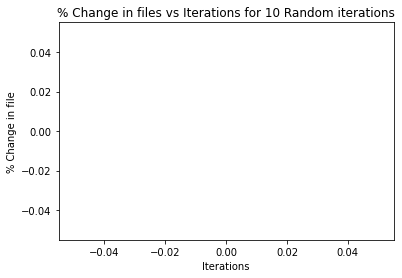

In [114]:
for elem in random_files:
    plt.plot(np.arange(len(elem)-1), elem[1:])
plt.xlabel('Iterations')
plt.ylabel('% Change in file')
plt.title('% Change in files vs Iterations for 10 Random iterations')
# plt.savefig('../data/plots/file_change_10_random_'+EXPERIMENT_TYPE+'.png')

### Histogram of no. of iterations for convergence

In [93]:
len_array = np.zeros(len(read_file['file_change']))
for i in range(len(read_file['file_change'])):
    len_array[i] = len(read_file['file_change'][i])

In [98]:
len_array_uq = np.unique(len_array, return_counts=True)

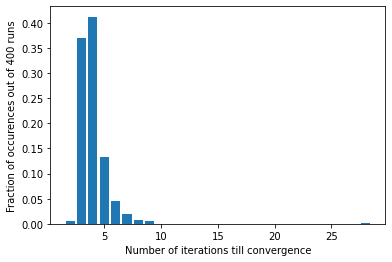

In [107]:
plt.bar(len_array_uq[0], len_array_uq[1]/400)
plt.xlabel('Number of iterations till convergence')
plt.ylabel('Fraction of occurences out of 400 runs')
# plt.savefig('../data/plots/convergence_bar_'+EXPERIMENT_TYPE+'.png')

In [78]:
max_len = 0
for elem in random_files:
    if len(elem) > max_len:
        max_len = len(elem)

In [79]:
for i in range(len(random_files)):
    elem = random_files[i]
    if len(elem) < max_len:
        to_add = max_len - len(elem)
        to_add_arr = np.full(fill_value=elem[-1], shape=to_add)
        elem = np.concatenate((elem, to_add_arr))
    random_files[i] = np.array(elem)

In [83]:
np.array(list(random_files)).shape

(50, 7)

In [58]:
to_plot

[1000000,
 0.1566265060240964,
 0.11627906976744186,
 0.07865168539325842,
 0.10344827586206896,
 0.06666666666666667,
 0.17073170731707318,
 0.17073170731707318,
 0.2,
 0.07865168539325842,
 0.06666666666666667,
 0.10344827586206896,
 0.14285714285714285,
 0.010526315789473684]